In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [37]:
kc_house_df=pd.read_csv(r"file:///C:\Users\hp\Downloads\kc_house_data.csv")
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Exploring data
kc_house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#Exploring data 
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

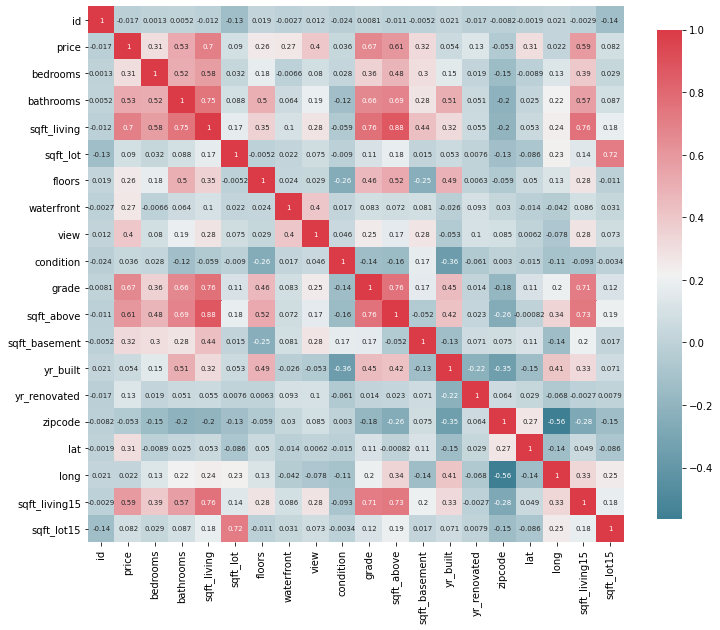

In [5]:
def plot_correlation_map( kc_house_df ):

    corr = kc_house_df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9}, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 7 }

        )
plot_correlation_map( kc_house_df )

Studying the correlation between price and other features we can find that there is a strong correlation between 
price and [sqft_living,bathrooms,grade,sqft_above,sqft_living,grade]; so they could be the most important features that affect the price.

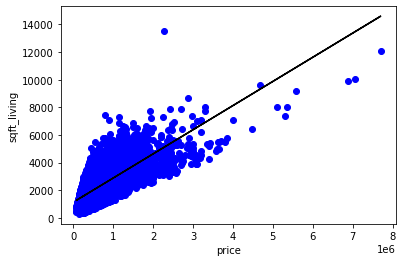

In [46]:
#Splitting data,Applying linear regression and plotting it. 
x=kc_house_df['price'].values[:,np.newaxis]
y=kc_house_df['sqft_living'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

plt.scatter(x_train,y_train,color="b")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()



In [48]:
print("MSE = ", mean_squared_error(y_test,predicted))
print("R squared = ", metrics.r2_score(y_test,predicted))

MSE =  421500.44404583937
R squared =  0.48843181750132014


we can see that R sqaured in linear regression is less than 0.5 which means that less than half of the output variation can be explained by the model's input.

In [29]:
#Multiple linear regression

x=kc_house_df[["sqft_living","bathrooms","grade"]] 
y=kc_house_df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 


print("MSE = ", mean_squared_error(y_test,predicted))
print("R squared = ", metrics.r2_score(y_test,predicted))

MSE 57182679093.53084
R squared 0.5438027083157995


we can see that R sqaured in the case of the multiple linear regression is greater that R sqaured in simple linear regression and it's also greater than 0.5 which means that more than half of the output variation can be explained by the model's input.

In [35]:
#Polynomial regression

x= kc_house_df[["sqft_living","bathrooms"]]
y= kc_house_df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  58540546688.985466
R squared:  0.5343485797814866


 Comparing R sqared in the case of polynomial regression to it's value in cases of simple and multiple linear regression we will find that R sqared in case of multiple linear regression is approximately the same as it's value in the case of polynomial regreesion.